#### Import Library

In [2]:
import numpy as np
import cv2
import tensorflow.keras
from tensorflow.keras.models  import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D,AveragePooling2D,GlobalMaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras import optimizers

import random,os,glob
import matplotlib.pyplot as plt
from matplotlib import image as mping
from random import shuffle
import collections, numpy

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#### Unzip the zip data file

In [10]:
!unzip input/garbage-classification.zip -d input/

流式输出内容被截断，只能显示最后 5000 行内容。
error [input/garbage-classification.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [input/garbage-classification.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [input/garbage-classification.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [input/garbage-classification.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [input/garbage-classification.zip]:  attempt to seek be

#### KNN Model (K Nearest Neighbor)

##### Data Load

In [3]:
dir_path = 'input/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

shuffle(img_list)

img = []
for i in img_list:
    a = i.split('\\')
    label = a[1]
    img.append([i,label])
    
training_set = img[0:2200]
testing_set = img[2200:len(img_list)]

print(len(img_list))
print(len(training_set))
print(len(testing_set))

2778
2200
578


384
512


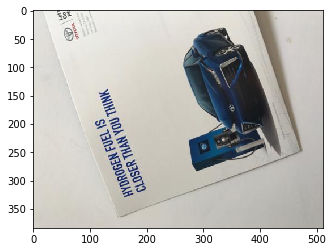

In [16]:
a = plt.imread(img_list[1])
print(len(a))
print(len(a[0]))
plt.imshow(a)

##### Classification Model

In [68]:
def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

k=50
retVal = []
for i in testing_set:
    diff = []
    test_image = cv2.imread(i[0])
    for j in training_set:
        train_image = cv2.imread(j[0])
        num = np.sum(np.abs(image_rebuild(test_image)-image_rebuild(train_image)))
        diff.append([num,j[1],i[1]])
    diff = sorted(diff)
    
    l = {"glass":0,"plastic":0,"cardboard":0,"metal":0,"paper":0,"trash":0}
    for x in range(k):
        l[diff[x][1]] += 1
        if(x%5 == 0):
            for key,value in l.items():
                if(value == max(l.values())):
                    if(key == i[1]):
                        retVal.append([x,True])

# correct = 0
# for y in retVal:
#     if(y[0]==y[1]):
#         correct += 1
# print(retVal)
# print("Accuacy : " , correct/len(retVal))
print(retVal)

[[0, True], [0, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [0, True], [5, True], [0, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [0, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [0, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [0, True], [10, True], [0, True], [5, True], [10, True], [15, True], [5, True], [0, True], [5, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [0, True], [10, True], [15, True], [20, True], [25, True], [30, True], [35, True], [40, True], [45, True], [0, True], [5, True], [10, True], [

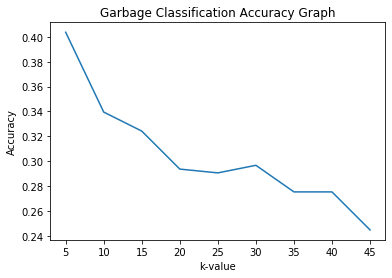

In [90]:
num5 = 0
num10 = 0
num15 = 0
num20 = 0
num25 = 0
num30 = 0
num35 = 0
num40 = 0
num45 = 0
for i in retVal:
    if i[0] == 5:
        num5 += 1
    elif i[0] == 10:
        num10 += 1
    elif i[0] == 15:
        num15 += 1
    elif i[0] == 20:
        num20 += 1
    elif i[0] == 25:
        num25 += 1
    elif i[0] == 30:
        num30 += 1
    elif i[0] == 35:
        num35 += 1
    elif i[0] == 40:
        num40 += 1
    elif i[0] ==45:
        num45 += 1

arr = [num5/len(testing_set),num10/len(testing_set),num15/len(testing_set),
       num20/len(testing_set),num25/len(testing_set),num30/len(testing_set),num35/len(testing_set),num40/len(testing_set),num45/len(testing_set)]
num  = [5,10,15,20,25,30,35,40,45]

plt.plot(num,arr)
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('k-value')
plt.show()

##### 10 Times Different Data Training

In [37]:
k = 5

count = 0
def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

result = []
while(count<10):
    count += 1
    print(count)
    shuffle(img)
    training_set = img[0:2200]
    testing_set = img[2200:len(img)]
    correct = 0
    for i in testing_set:
        diff = []
        test_image = cv2.imread(i[0])
        for j in training_set:
            train_image = cv2.imread(j[0])
            num = np.sum(np.abs(image_rebuild(test_image)-image_rebuild(train_image)))
            diff.append([num,j[1],i[1]])
        diff = sorted(diff)
        
        l = {"glass":0,"plastic":0,"cardboard":0,"metal":0,"paper":0,"trash":0}
        for x in range(k):
            l[diff[x][1]] += 1
        for key,value in l.items():
            if(value == max(l.values()) and key == i[1]):
                correct += 1
    result.append(correct/len(testing_set))

1
2
3
4
5
6
7
8
9
10


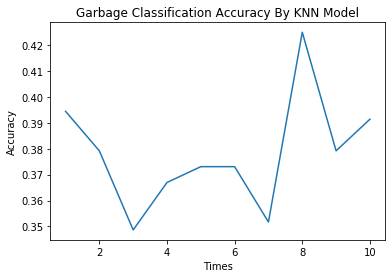

In [38]:
times = [1,2,3,4,5,6,7,8,9,10]

plt.plot(times,result)
plt.title('Garbage Classification Accuracy By KNN Model')
plt.ylabel('Accuracy')
plt.xlabel('Times')
plt.show()

#### SVM Model (Support Vector Machine)

##### Load Data

In [17]:
dir_path = 'input/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

shuffle(img_list)

img = []
for i in img_list:
    a = i.split('\\')
    label = a[1]
    real_img = plt.imread(i)
    img.append([real_img,label])
    
training_set = img[0:2200]
testing_set = img[2200:len(img_list)]

classes = ["glass","plastic","cardboard","metal","paper","trash"]
print(len(classes))

6


##### Classification Model
##### Code Reference From https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

##### First model With Linear kernal

In [12]:
def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

training_samples = np.array([image_rebuild(x[0]) for x in training_set])
training_targets = np.array([x[1] for x in training_set])

testing_samples = np.array([image_rebuild(x[0]) for x in testing_set])
testing_targets = np.array([x[1] for x in testing_set])

training_samples = training_samples.reshape(len(training_samples),-1)
testing_samples = testing_samples.reshape(len(testing_samples),-1)

clf = OneVsRestClassifier(SVC(gamma='scale',kernel='linear'))
clf.fit(training_samples,training_targets)

result = clf.predict(testing_samples)

[217 217 217 ... 162 162 162]
[217 217 217 ... 162 162 162]
['glass' 'cardboard' 'cardboard' ... 'plastic' 'cardboard' 'metal']
glass__________________


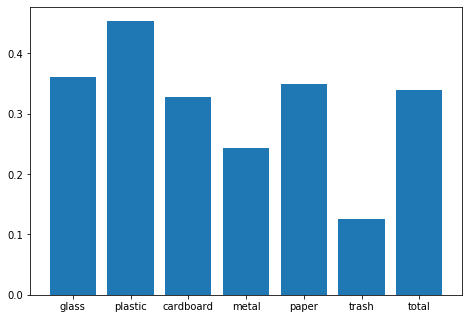

In [27]:
# print(result)
# print(testing_targets)
categorial = ["glass","plastic","cardboard","metal","paper","trash","total"]

correct_glass = 0
correct_plastic = 0
correct_cardboard = 0
correct_metal = 0
correct_paper = 0
correct_trash = 0
for i in range(0,len(result)):
    if (result[i] == testing_targets[i]):
        if(result[i] == "glass"):
            correct_glass += 1
        elif(result[i] == "plastic"):
            correct_plastic += 1
        elif(result[i] == "cardboard"):
            correct_cardboard += 1
        elif(result[i] == "metal"):
            correct_metal += 1
        elif(result[i] == "paper"):
            correct_paper += 1
        elif(result[i] == "trash"):
            correct_trash += 1
            
total = collections.Counter(testing_targets)
correct_total = correct_glass + correct_plastic + correct_cardboard + correct_metal + correct_paper + correct_trash

accuracy = [correct_glass/total["glass"],correct_plastic/total["plastic"], correct_cardboard/total["cardboard"],
                       correct_metal/total["metal"], correct_paper/total["paper"], correct_trash/total["trash"], correct_total / len(testing_targets)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(categorial,accuracy)
plt.show()

##### Second Model With Polynomial Kernel

In [28]:
training_set = img[0:2200]
testing_set = img[2200:len(img_list)]

def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

training_samples = np.array([image_rebuild(x[0]) for x in training_set])
training_targets = np.array([x[1] for x in training_set])

testing_samples = np.array([image_rebuild(x[0]) for x in testing_set])
testing_targets = np.array([x[1] for x in testing_set])

training_samples = training_samples.reshape(len(training_samples),-1)
testing_samples = testing_samples.reshape(len(testing_samples),-1)

clf = OneVsRestClassifier(SVC(gamma='scale',kernel='poly'))
clf.fit(training_samples,training_targets)

result = clf.predict(testing_samples)

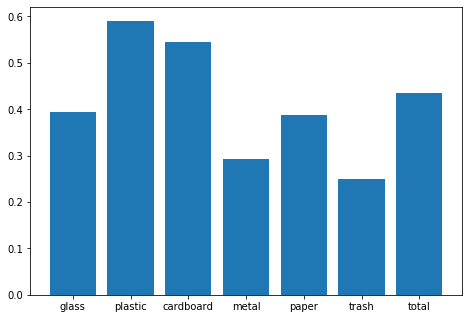

In [29]:
categorial = ["glass","plastic","cardboard","metal","paper","trash","total"]

correct_glass = 0
correct_plastic = 0
correct_cardboard = 0
correct_metal = 0
correct_paper = 0
correct_trash = 0
for i in range(0,len(result)):
    if (result[i] == testing_targets[i]):
        if(result[i] == "glass"):
            correct_glass += 1
        elif(result[i] == "plastic"):
            correct_plastic += 1
        elif(result[i] == "cardboard"):
            correct_cardboard += 1
        elif(result[i] == "metal"):
            correct_metal += 1
        elif(result[i] == "paper"):
            correct_paper += 1
        elif(result[i] == "trash"):
            correct_trash += 1
            
total = collections.Counter(testing_targets)
correct_total = correct_glass + correct_plastic + correct_cardboard + correct_metal + correct_paper + correct_trash

accuracy = [correct_glass/total["glass"],correct_plastic/total["plastic"], correct_cardboard/total["cardboard"],
                       correct_metal/total["metal"], correct_paper/total["paper"], correct_trash/total["trash"], correct_total / len(testing_targets)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(categorial,accuracy)
plt.show()

##### Third Model With RBF Kernel

In [3]:
training_set = img[0:2200]
testing_set = img[2200:len(img_list)]

def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

training_samples = np.array([image_rebuild(x[0]) for x in training_set])
training_targets = np.array([x[1] for x in training_set])

testing_samples = np.array([image_rebuild(x[0]) for x in testing_set])
testing_targets = np.array([x[1] for x in testing_set])

training_samples = training_samples.reshape(len(training_samples),-1)
testing_samples = testing_samples.reshape(len(testing_samples),-1)

clf = OneVsRestClassifier(SVC(gamma='scale',kernel='rbf'))
clf.fit(training_samples,training_targets)

result = clf.predict(testing_samples)

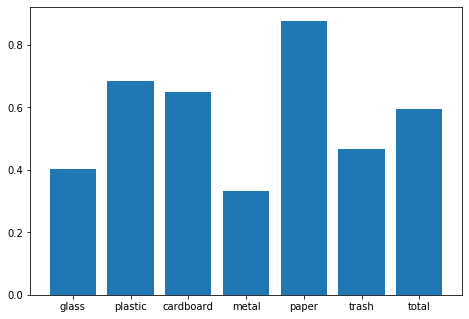

In [4]:
categorial = ["glass","plastic","cardboard","metal","paper","trash","total"]

correct_glass = 0
correct_plastic = 0
correct_cardboard = 0
correct_metal = 0
correct_paper = 0
correct_trash = 0
for i in range(0,len(result)):
    if (result[i] == testing_targets[i]):
        if(result[i] == "glass"):
            correct_glass += 1
        elif(result[i] == "plastic"):
            correct_plastic += 1
        elif(result[i] == "cardboard"):
            correct_cardboard += 1
        elif(result[i] == "metal"):
            correct_metal += 1
        elif(result[i] == "paper"):
            correct_paper += 1
        elif(result[i] == "trash"):
            correct_trash += 1
            
total = collections.Counter(testing_targets)
correct_total = correct_glass + correct_plastic + correct_cardboard + correct_metal + correct_paper + correct_trash

accuracy = [correct_glass/total["glass"],correct_plastic/total["plastic"], correct_cardboard/total["cardboard"],
                       correct_metal/total["metal"], correct_paper/total["paper"], correct_trash/total["trash"], correct_total / len(testing_targets)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(categorial,accuracy)
plt.show()

##### 10 Times Training

In [5]:
def image_rebuild(image, size=(300, 300)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.resize(image, size)

times = 0

acc = []
time_l = []
while(times <=10):
    
    times += 1
    print(times)
    time_l.append(times)
    
    shuffle(img)
    training_set = img[0:2200]
    testing_set = img[2200:len(img_list)]
    
    training_samples = np.array([image_rebuild(x[0]) for x in training_set]).reshape(len(training_samples),-1)
    training_targets = np.array([x[1] for x in training_set])

    testing_samples = np.array([image_rebuild(x[0]) for x in testing_set]).reshape(len(testing_samples),-1)
    testing_targets = np.array([x[1] for x in testing_set])

    clf = OneVsRestClassifier(SVC(gamma='scale',kernel='rbf'))
    clf.fit(training_samples,training_targets)

    result = clf.predict(testing_samples)

    total = 0
    for i in range(0,len(result)):
        if(result[i] == testing_targets[i]):
            total += 1
    acc.append(total/len(testing_targets))

1
2
3
4
5
6
7
8
9
10
11


[0.5626911314984709, 0.5963302752293578, 0.5840978593272171, 0.5718654434250765, 0.5657492354740061, 0.599388379204893, 0.599388379204893, 0.581039755351682, 0.5932721712538226, 0.6269113149847095]


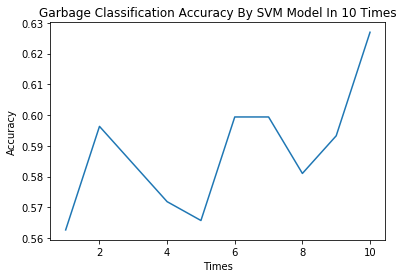

[0.5626911314984709, 0.5963302752293578, 0.5840978593272171, 0.5718654434250765, 0.5657492354740061, 0.599388379204893, 0.599388379204893, 0.581039755351682, 0.5932721712538226, 0.6269113149847095, 0.5229357798165137]


In [13]:
a = [1,2,3,4,5,6,7,8,9,10]
b = acc[0:10]
print(b)
plt.plot(a,b)
plt.title('Garbage Classification Accuracy By SVM Model In 10 Times')
plt.ylabel('Accuracy')
plt.xlabel('Times')
plt.show()
print(acc)

#### CNN Model

##### Load the data set into variables (img_list)

In [18]:
dir_path = 'input/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))
len(img_list)

2778

In [349]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,validation_split=0.1)

training_samples=train.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,class_mode='categorical',subset='training')
testing_samples=test.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,class_mode='categorical',subset='validation')

# Code Reference from https://keras.io/preprocessing/image/      and  https://keras.io/examples/mnist_cnn/

Found 2502 images belonging to 6 classes.
Found 276 images belonging to 6 classes.


##### First Model
##### 8 Layers : Conv2D + AvgPooling + Conv2D + AvgPooling + Conv2D +AvgPooling + ReLU + Softmax

In [17]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(AveragePooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=30, steps_per_epoch=100,validation_data=testing_samples,validation_steps=30)

# Code Reference from https://keras.io/models/sequential/

Epoch 1/30
100/100 [==============================] - 375s 4s/step - loss: 1.6791 - acc: 0.2834 - val_loss: 1.5502 - val_acc: 0.3418
Epoch 2/30
100/100 [==============================] - 401s 4s/step - loss: 1.4567 - acc: 0.4243 - val_loss: 1.5109 - val_acc: 0.3608
Epoch 3/30
100/100 [==============================] - 403s 4s/step - loss: 1.3324 - acc: 0.4817 - val_loss: 1.3571 - val_acc: 0.5111
Epoch 4/30
100/100 [==============================] - 397s 4s/step - loss: 1.2738 - acc: 0.5178 - val_loss: 1.2576 - val_acc: 0.5397
Epoch 5/30
100/100 [==============================] - 345s 3s/step - loss: 1.1410 - acc: 0.5678 - val_loss: 1.3062 - val_acc: 0.4952
Epoch 6/30
100/100 [==============================] - 384s 4s/step - loss: 1.1024 - acc: 0.5859 - val_loss: 1.1332 - val_acc: 0.5714
Epoch 7/30
100/100 [==============================] - 398s 4s/step - loss: 1.0429 - acc: 0.6088 - val_loss: 1.1473 - val_acc: 0.5619
Epoch 8/30
100/100 [==============================] - 391s 4s/step - 

In [21]:
model.save('model.h5')

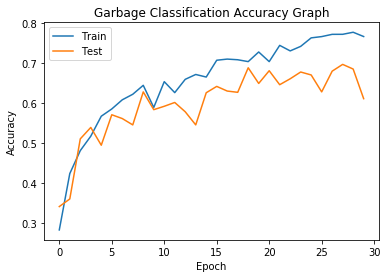

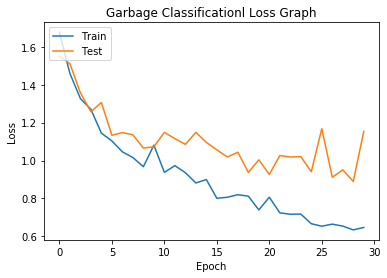

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

##### Second Model
##### 8 Layers : Conv2D + MaxPooling + Conv2D + MaxPooling + Conv2D + MaxPooling + ReLU + Softmax

In [29]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=30, steps_per_epoch=100,validation_data=testing_samples,validation_steps=30)

# Code Reference from https://keras.io/models/sequential/

Epoch 1/30
100/100 [==============================] - 327s 3s/step - loss: 1.5234 - acc: 0.3661 - val_loss: 1.3976 - val_acc: 0.4624
Epoch 2/30
100/100 [==============================] - 330s 3s/step - loss: 1.3369 - acc: 0.4578 - val_loss: 1.3131 - val_acc: 0.4921
Epoch 3/30
100/100 [==============================] - 325s 3s/step - loss: 1.2392 - acc: 0.5016 - val_loss: 1.1900 - val_acc: 0.5693
Epoch 4/30
100/100 [==============================] - 325s 3s/step - loss: 1.1231 - acc: 0.5789 - val_loss: 1.1863 - val_acc: 0.5693
Epoch 5/30
100/100 [==============================] - 327s 3s/step - loss: 1.0722 - acc: 0.5943 - val_loss: 1.1397 - val_acc: 0.5608
Epoch 6/30
100/100 [==============================] - 328s 3s/step - loss: 1.0342 - acc: 0.6135 - val_loss: 1.1028 - val_acc: 0.5778
Epoch 7/30
100/100 [==============================] - 325s 3s/step - loss: 0.9400 - acc: 0.6517 - val_loss: 1.0777 - val_acc: 0.5714
Epoch 8/30
100/100 [==============================] - 328s 3s/step - 

In [31]:
model.save('model2.h5')

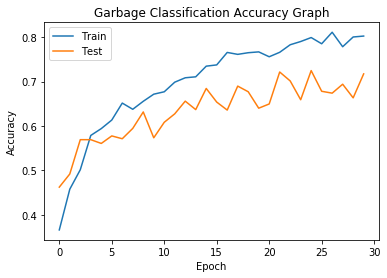

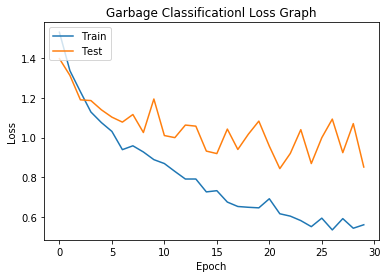

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

##### Third Model
##### 10 Layers ：Conv2D + MaxPooling + Conv2D + MaxPooling + Conv2D + MaxPooling + Conv2D + MaxPooling + ReLU + Softmax

In [33]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=30, steps_per_epoch=100,validation_data=testing_samples,validation_steps=30)

# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

Epoch 1/30
100/100 [==============================] - 337s 3s/step - loss: 1.6335 - acc: 0.2774 - val_loss: 1.4953 - val_acc: 0.3630
Epoch 2/30
100/100 [==============================] - 333s 3s/step - loss: 1.3881 - acc: 0.4303 - val_loss: 1.4004 - val_acc: 0.4169
Epoch 3/30
100/100 [==============================] - 332s 3s/step - loss: 1.2489 - acc: 0.5092 - val_loss: 1.3325 - val_acc: 0.4540
Epoch 4/30
100/100 [==============================] - 337s 3s/step - loss: 1.1285 - acc: 0.5700 - val_loss: 1.2032 - val_acc: 0.5693
Epoch 5/30
100/100 [==============================] - 332s 3s/step - loss: 1.1262 - acc: 0.5776 - val_loss: 1.1971 - val_acc: 0.5534
Epoch 6/30
100/100 [==============================] - 332s 3s/step - loss: 1.0313 - acc: 0.6072 - val_loss: 1.3269 - val_acc: 0.5429
Epoch 7/30
100/100 [==============================] - 334s 3s/step - loss: 0.9931 - acc: 0.6359 - val_loss: 1.0863 - val_acc: 0.5820
Epoch 8/30
100/100 [==============================] - 331s 3s/step - 

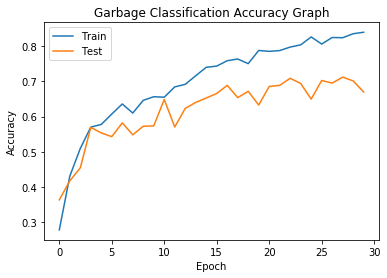

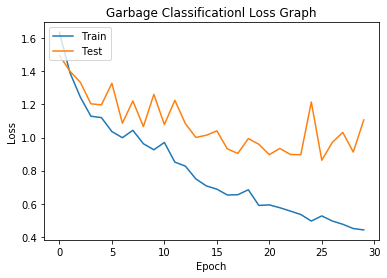

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

In [36]:
model.save('model3.h5')

##### Fourth Model

In [34]:
model=Sequential()

#Input Size = 300 * 300 * 3 , Cause it 2D RGB image so use Con2D
model.add(Conv2D(64,(3,3),padding='same',use_bias=True,input_shape=(300,300,3),activation='relu'))
#Parameters : (3*3*3+1)*64   Ouput Size = 298 * 298 * 64

model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3),padding='same',use_bias=True,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,(3,3),padding='same',use_bias=True,activation='relu'))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))
model.add(Dense(216,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [35]:
ad = optimizers.Adam(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=ad, metrics=['acc'])

history = model.fit_generator(training_samples, epochs=200, steps_per_epoch=70,validation_data=testing_samples,validation_steps=10)

Epoch 1/200
70/70 [==============================] - 223s 3s/step - loss: 1.7788 - acc: 0.2108 - val_loss: 1.7577 - val_acc: 0.2353
Epoch 2/200
70/70 [==============================] - 214s 3s/step - loss: 1.7354 - acc: 0.2403 - val_loss: 1.7123 - val_acc: 0.2491
Epoch 3/200
70/70 [==============================] - 216s 3s/step - loss: 1.7220 - acc: 0.2321 - val_loss: 1.7257 - val_acc: 0.2249
Epoch 4/200
70/70 [==============================] - 214s 3s/step - loss: 1.7200 - acc: 0.2274 - val_loss: 1.6819 - val_acc: 0.2318
Epoch 5/200
70/70 [==============================] - 214s 3s/step - loss: 1.7076 - acc: 0.2416 - val_loss: 1.6938 - val_acc: 0.2249
Epoch 6/200
70/70 [==============================] - 213s 3s/step - loss: 1.6982 - acc: 0.2523 - val_loss: 1.6651 - val_acc: 0.2353
Epoch 7/200
70/70 [==============================] - 222s 3s/step - loss: 1.6858 - acc: 0.2638 - val_loss: 1.8244 - val_acc: 0.2561
Epoch 8/200
70/70 [==============================] - 216s 3s/step - loss: 1.

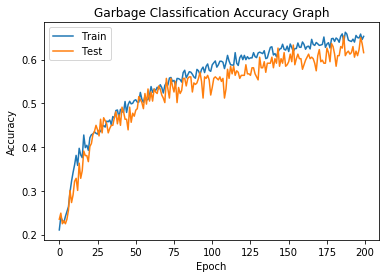

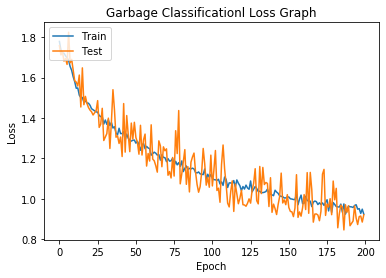

In [36]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

In [37]:
model.save('model4.h5')

##### Fifth Model

In [38]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=100, steps_per_epoch=100,validation_data=testing_samples,validation_steps=30)

# Code Reference from https://keras.io/models/sequential/

Epoch 1/100
100/100 [==============================] - 308s 3s/step - loss: 1.7302 - acc: 0.2323 - val_loss: 1.7032 - val_acc: 0.2307
Epoch 2/100
100/100 [==============================] - 307s 3s/step - loss: 1.6998 - acc: 0.2589 - val_loss: 1.6927 - val_acc: 0.2445
Epoch 3/100
100/100 [==============================] - 307s 3s/step - loss: 1.6270 - acc: 0.3135 - val_loss: 1.4991 - val_acc: 0.3806
Epoch 4/100
100/100 [==============================] - 307s 3s/step - loss: 1.5504 - acc: 0.3686 - val_loss: 1.4356 - val_acc: 0.4429
Epoch 5/100
100/100 [==============================] - 307s 3s/step - loss: 1.4993 - acc: 0.4059 - val_loss: 1.2831 - val_acc: 0.4233
Epoch 6/100
100/100 [==============================] - 307s 3s/step - loss: 1.4467 - acc: 0.4321 - val_loss: 1.2739 - val_acc: 0.4441
Epoch 7/100
100/100 [==============================] - 307s 3s/step - loss: 1.3808 - acc: 0.4573 - val_loss: 1.3969 - val_acc: 0.4383
Epoch 8/100
100/100 [==============================] - 306s 3s

In [40]:
model.save('model5.h5')

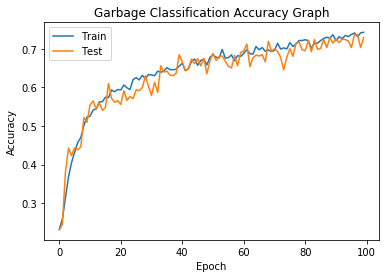

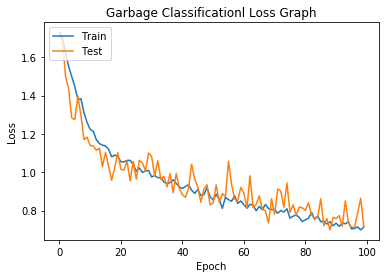

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

In [50]:
acc += history.history['acc']
val_acc += history.history['val_acc']
loss += history.history['loss']
val_loss += history.history['val_loss']

In [51]:
history = model.fit_generator(training_samples, epochs=30, steps_per_epoch=100,validation_data=testing_samples,validation_steps=30)

Epoch 1/29
100/100 [==============================] - 314s 3s/step - loss: 0.7146 - acc: 0.7395 - val_loss: 0.7339 - val_acc: 0.7243
Epoch 2/29
100/100 [==============================] - 311s 3s/step - loss: 0.7081 - acc: 0.7330 - val_loss: 0.6972 - val_acc: 0.7405
Epoch 3/29
100/100 [==============================] - 315s 3s/step - loss: 0.7019 - acc: 0.7509 - val_loss: 0.7064 - val_acc: 0.7313
Epoch 4/29
100/100 [==============================] - 334s 3s/step - loss: 0.6964 - acc: 0.7433 - val_loss: 0.8039 - val_acc: 0.6990
Epoch 5/29
100/100 [==============================] - 335s 3s/step - loss: 0.6866 - acc: 0.7424 - val_loss: 0.7432 - val_acc: 0.7474
Epoch 6/29
100/100 [==============================] - 330s 3s/step - loss: 0.6863 - acc: 0.7455 - val_loss: 0.7708 - val_acc: 0.7197
Epoch 7/29
100/100 [==============================] - 322s 3s/step - loss: 0.6956 - acc: 0.7502 - val_loss: 0.8180 - val_acc: 0.7278
Epoch 8/29
100/100 [==============================] - 317s 3s/step - 

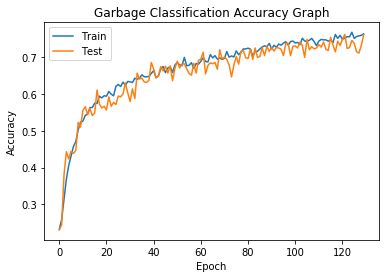

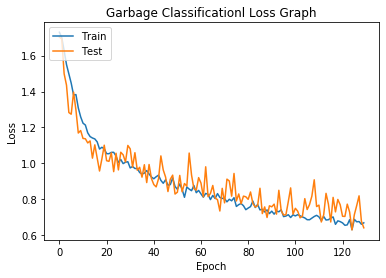

In [61]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
model.save('model5.h5')

In [62]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.23226008, 0.25891182, 0.31353548, 0.36855268, 0.40587866, 0.4321451, 0.4573304, 0.47045952, 0.5017193, 0.5231395, 0.5257893, 0.5414192, 0.54471546, 0.56267583, 0.56298846, 0.5747342, 0.57392937, 0.5934959, 0.58893406, 0.5947467, 0.593623, 0.60643953, 0.59912443, 0.5945608, 0.6205064, 0.62550795, 0.61976236, 0.63175994, 0.6228893, 0.6336355, 0.63258284, 0.630625, 0.6422764, 0.6394622, 0.6430134, 0.65145355, 0.64634144, 0.64613944, 0.6473898, 0.65540963, 0.66291434, 0.6436386, 0.6486402, 0.66739607, 0.6739606, 0.6575985, 0.67020947, 0.6732333, 0.65833074, 0.6782364, 0.6845889, 0.6786496, 0.6764614, 0.6988743, 0.6760475, 0.67739916, 0.6845889, 0.66927165, 0.68240076, 0.6804253, 0.6883401, 0.69793624, 0.68771493, 0.68646455, 0.706379, 0.697718, 0.7035647, 0.69396687, 0.6976235, 0.693125, 0.69637275, 0.7145983, 0.69949967, 0.7027196, 0.7001251, 0.7164739, 0.70615816, 0.7129456, 0.72178805, 0.72178805, 0.72388995, 0.7214755, 0.7017818, 0.71450907, 0.7152235, 0.7217011, 0.7271022, 0.730228

##### Sixth Model

In [246]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

In [248]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=200, steps_per_epoch=2276//32,validation_data=testing_samples,workers = 4,validation_steps=251//32)
# Code Reference from https://keras.io/models/sequential/

Epoch 1/200
70/71 [============================>.] - ETA: 2s - loss: 1.7099 - acc: 0.2983
Epoch 00001: val_acc improved from -inf to 0.38393, saving model to trained_model.h5
71/71 [==============================] - 218s 3s/step - loss: 1.7049 - acc: 0.3007 - val_loss: 1.5022 - val_acc: 0.3839
Epoch 2/200
70/71 [============================>.] - ETA: 3s - loss: 1.4745 - acc: 0.3881
Epoch 00002: val_acc did not improve from 0.38393
71/71 [==============================] - 230s 3s/step - loss: 1.4779 - acc: 0.3862 - val_loss: 1.4811 - val_acc: 0.3482
Epoch 3/200
70/71 [============================>.] - ETA: 2s - loss: 1.3864 - acc: 0.4446
Epoch 00003: val_acc improved from 0.38393 to 0.43750, saving model to trained_model.h5
71/71 [==============================] - 219s 3s/step - loss: 1.3838 - acc: 0.4445 - val_loss: 1.3567 - val_acc: 0.4375
Epoch 4/200
70/71 [============================>.] - ETA: 2s - loss: 1.3280 - acc: 0.4687
Epoch 00004: val_acc improved from 0.43750 to 0.47321, sa

In [249]:
model.save('model6.h5')

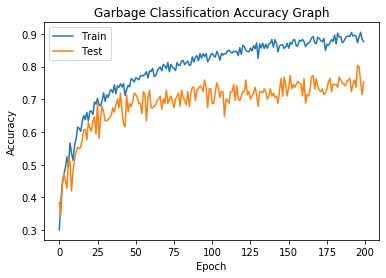

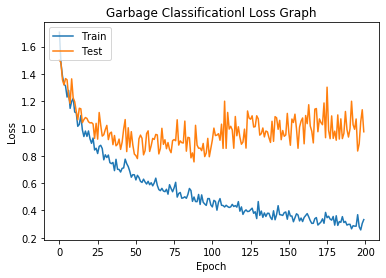

In [251]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/

##### Seventh Model 

In [350]:
model=Sequential()
    
model.add(Conv2D(64,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
# Code Reference from https://keras.io/layers/convolutional/ and https://keras.io/layers/core/

In [351]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit_generator(training_samples, epochs=40, steps_per_epoch=2502//32,validation_data=testing_samples,workers = 4,validation_steps=276//32)
# Code Reference from https://keras.io/models/sequential/

Epoch 1/40
77/78 [============================>.] - ETA: 2s - loss: 1.7315 - acc: 0.2211
Epoch 00001: val_acc improved from -inf to 0.24219, saving model to trained_model2.h5
78/78 [==============================] - 234s 3s/step - loss: 1.7325 - acc: 0.2215 - val_loss: 1.7177 - val_acc: 0.2422
Epoch 2/40
77/78 [============================>.] - ETA: 2s - loss: 1.6896 - acc: 0.2576
Epoch 00002: val_acc did not improve from 0.24219
78/78 [==============================] - 233s 3s/step - loss: 1.6881 - acc: 0.2591 - val_loss: 1.7281 - val_acc: 0.2188
Epoch 3/40
77/78 [============================>.] - ETA: 2s - loss: 1.5682 - acc: 0.3470
Epoch 00003: val_acc improved from 0.24219 to 0.41797, saving model to trained_model2.h5
78/78 [==============================] - 232s 3s/step - loss: 1.5708 - acc: 0.3470 - val_loss: 1.4680 - val_acc: 0.4180
Epoch 4/40
77/78 [============================>.] - ETA: 2s - loss: 1.4807 - acc: 0.4011
Epoch 00004: val_acc improved from 0.41797 to 0.42188, savi

In [352]:
model.save('model7.h5')

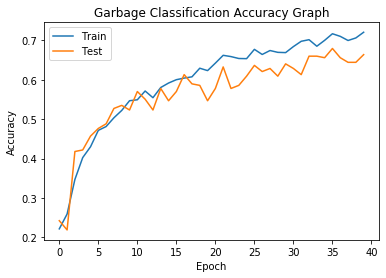

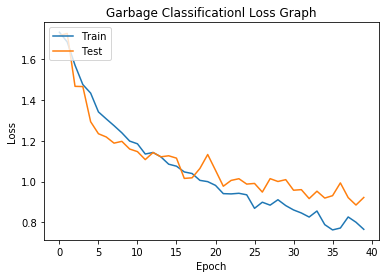

In [353]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Garbage Classification Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage Classificationl Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Code Reference from https://keras.io/visualization/